##5: Гистограмма
В предыдущем задании вы визуализировали распределение, вручную группируя значения с помощью библиотеки Pandas. Было бы полезно как-то автоматизировать эту задачу? Нет ничего проще.

Но для этого нам нужно использовать другой тип визуализации данных — гистограмму. На этот раз вместо средних значений мы будем использовать абсолютные значения числа коммитов и сравним их в рабочие и выходные дни.

Выполните необходимые шаги по созданию следующего графика:


##1. Анализируйте только пользователей, а не администраторов.


## 2. Используйте фильтр status = 'ready' для коммитов.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
con = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
com_s = pd.read_sql('''select timestamp from checker where status = 'ready' and uid like 'user_%' ''', con)

In [5]:
com_s['timestamp'] = com_s['timestamp'].astype('datetime64[ns]')

In [7]:
com_s['weekdays'] = pd.cut(com_s.timestamp.dt.weekday, bins = [0,5,7], labels=['working day','weekend'], right=False)

In [8]:
com_s['hour'] = com_s.timestamp.dt.hour

##3. Создайте два списка значений (для рабочих дней и для выходных) в качестве входных данных для гистограммы.

In [9]:
workd = com_s[com_s['weekdays']=='working day'][['weekdays','hour']]
workd.shape

(1059, 2)

In [10]:
weekend = com_s[com_s['weekdays']=='weekend'][['weekdays','hour']]
weekend.shape

(627, 2)

## 4. Размер figsize остается прежним; размер шрифта и цветовую палитру выбирайте по своему вкусу.


## 5. Используйте уровень прозрачности 0,7 для переднего слоя гистограммы.

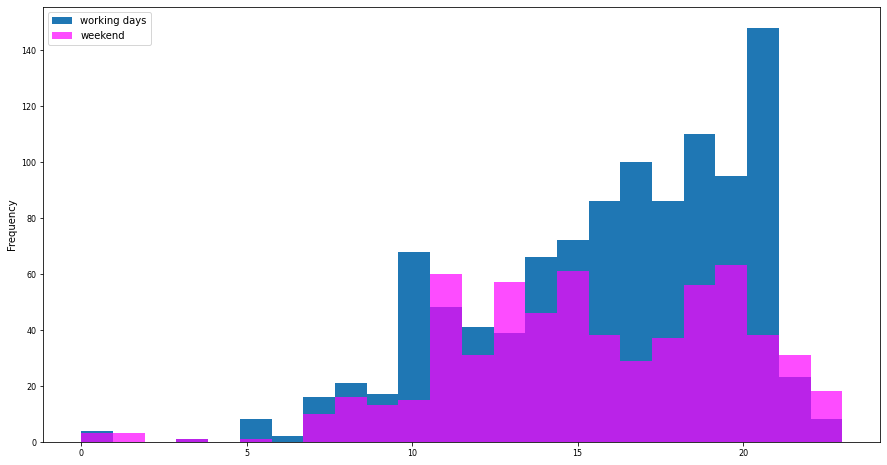

In [11]:
weekend.plot( 
           kind = 'hist',
           bins = 24,
           fontsize = 8,
           figsize = (15,8),
           alpha = 0.7,
           color = ['#fd00ff', '#1aff1a'],
           ax = workd.plot.hist(bins = 24))
plt.legend(['working days', 'weekend'], loc = 'upper left')
plt.show()

In [12]:
con.close()

## 6. В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Существуют ли часы, когда общее количество коммитов было выше в выходные дни, чем в рабочие?». В своем ответе приведите примеры с 4 наибольшими значениями.

## Ответ: 11, 13, 22, 23